In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import LSTM, Dense, Reshape
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
np.set_printoptions(linewidth=160)

In [3]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime.today()

tickers = pd.read_csv("omx_tickers.csv", header=None) # as of 2021-03-01
tickers = list(tickers[0])
for i in range(len(tickers)):
    tickers[i] = tickers[i].replace(" ", "-") + ".ST"
print(len(tickers), tickers)

386 ['8TRA.ST', 'AAK.ST', 'ABB.ST', 'ADDT-B.ST', 'AF-B.ST', 'ALFA.ST', 'ALIV-SDB.ST', 'AM1S.ST', 'ARION-SDB.ST', 'ARJO-B.ST', 'ASSA-B.ST', 'ATCO-A.ST', 'ATCO-B.ST', 'ATRLJ-B.ST', 'AXFO.ST', 'AZA.ST', 'AZN.ST', 'BALD-B.ST', 'BEIJ-B.ST', 'BETS-B.ST', 'BHG.ST', 'BILL.ST', 'BOL.ST', 'BRAV.ST', 'BURE.ST', 'CAST.ST', 'CATE.ST', 'CINT.ST', 'DOM.ST', 'EKTA-B.ST', 'ELUX-A.ST', 'ELUX-B.ST', 'EPI-A.ST', 'EPI-B.ST', 'EPRO-B.ST', 'EQT.ST', 'ERIC-A.ST', 'ERIC-B.ST', 'ESSITY-A.ST', 'ESSITY-B.ST', 'EVO.ST', 'FABG.ST', 'FOI-B.ST', 'FPAR-A.ST', 'FPAR-D.ST', 'FPAR-PREF.ST', 'GETI-B.ST', 'HEXA-B.ST', 'HM-B.ST', 'HOLM-A.ST', 'HOLM-B.ST', 'HPOL-B.ST', 'HUFV-A.ST', 'HUSQ-A.ST', 'HUSQ-B.ST', 'ICA.ST', 'INDT.ST', 'INDU-A.ST', 'INDU-C.ST', 'INTRUM.ST', 'INVE-A.ST', 'INVE-B.ST', 'JM.ST', 'KIND-SDB.ST', 'KINV-A.ST', 'KINV-B.ST', 'KLED.ST', 'KLOV-A.ST', 'KLOV-B.ST', 'KLOV-PREF.ST', 'LATO-B.ST', 'LIFCO-B.ST', 'LOOMIS.ST', 'LUMI.ST', 'LUND-B.ST', 'LUNE.ST', 'MCOV-B.ST', 'MYCR.ST', 'NCC-A.ST', 'NCC-B.ST', 'NDA-SE.ST'

In [4]:
chosen = tickers[2:52]
number_of_stocks = len(chosen)
print(number_of_stocks)

50


In [5]:
OMX_raw = web.DataReader(chosen, 'yahoo', start, end)
OMX_raw

Attributes   Adj Close                                                  \
Symbols         ABB.ST   ADDT-B.ST     AF-B.ST     ALFA.ST ALIV-SDB.ST   
Date                                                                     
2006-01-02   72.246819    4.216785   16.472969   30.425013  307.770813   
2006-01-03   74.123360    4.182410   16.472969   30.784010  309.459747   
2006-01-04   75.296196    4.216785   16.650484   30.425013  317.903198   
2006-01-05   76.469032    4.193869   16.685984   30.425013  328.457855   
2006-01-06   76.469032    4.193869         NaN   30.425013         NaN   
...                ...         ...         ...         ...         ...   
2021-03-02  248.600006  128.000000  236.000000  266.899994  776.200012   
2021-03-03  249.199997  126.000000  235.800003  272.799988  802.200012   
2021-03-04  249.699997  123.000000  231.800003  270.299988  786.200012   
2021-03-05  247.800003  122.000000  231.399994  270.000000  775.599976   
2021-03-08  258.899994  125.000000  236.000000  276.000000  824.400024   

Attributes                                                              ...  \
Symbols        AM1S.ST ARION-SDB.ST  ARJO-B.ST   ASSA-B.ST   ATCO-A.ST  ...   
Date                                                                    ...   
2006-01-02         NaN          NaN        NaN   30.531702   41.033615  ...   
2006-01-03         NaN          NaN        NaN   30.531702   40.682899  ...   
2006-01-04         NaN          NaN        NaN   30.652386   40.565998  ...   
2006-01-05         NaN          NaN        NaN   30.411028   41.033615  ...   
2006-01-06         NaN          NaN        NaN         NaN   41.033615  ...   
...                ...          ...        ...         ...         ...  ...   
2021-03-02  180.399994         8.13  64.000000  220.399994  501.200012  ...   
2021-03-03  179.399994         8.00  63.650002  224.000000  498.000000  ...   
2021-03-04  180.000000         8.06  64.050003  225.000000  485.399994  ...   
2021-03-05  180.199997         8.01  63.950001  227.800003  475.200012  ...   
2021-03-08  180.800003         7.84  64.699997  235.000000  486.899994  ...   

Attributes   Volume                                                         \
Symbols    FOI-B.ST FPAR-A.ST FPAR-D.ST FPAR-PREF.ST  GETI-B.ST  HEXA-B.ST   
Date                                                                         
2006-01-02      NaN   20700.0       NaN          NaN   318833.0   218242.0   
2006-01-03      NaN   16866.0       NaN          NaN  1020052.0   863281.0   
2006-01-04      NaN   62867.0       NaN          NaN   478551.0  1121070.0   
2006-01-05      NaN   30667.0       NaN          NaN   642657.0        0.0   
2006-01-06      NaN       0.0       NaN          NaN        NaN        0.0   
...             ...       ...       ...          ...        ...        ...   
2021-03-02   5785.0   21216.0    8260.0       1246.0   580420.0   706022.0   
2021-03-03   1990.0   33375.0    7669.0       1627.0   977450.0   421803.0   
2021-03-04   1557.0   13005.0   17142.0       2691.0   545322.0   610040.0   
2021-03-05   3841.0   13186.0    7807.0        386.0   627578.0   571687.0   
2021-03-08    989.0   50884.0   12965.0       6796.0   574631.0   296352.0   

Attributes                                           
Symbols       HM-B.ST HOLM-A.ST HOLM-B.ST HPOL-B.ST  
Date                                                 
2006-01-02  1766438.0       0.0  106438.0  166800.0  
2006-01-03  4526396.0       0.0  953926.0  660100.0  
2006-01-04  8741356.0    1650.0  889124.0  857200.0  
2006-01-05  2665498.0       0.0  262436.0  201300.0  
2006-01-06        NaN       0.0       0.0       0.0  
...               ...       ...       ...       ...  
2021-03-02  2354429.0     548.0  134053.0  676766.0  
2021-03-03  3053506.0     469.0  173117.0  548247.0  
2021-03-04  2586541.0     448.0  148838.0  363417.0  
2021-03-05  2024966.0     656.0  207022.0  395665.0  
2021-03-08  1905592.0    1036.0  119093.0  493898.0  

[3815 

In [6]:
OMX = OMX_raw.copy()
OMX["Open"] = OMX["Open"] * OMX["Adj Close"] / OMX["Close"]
OMX.rename(columns={"Open":"Adj Open"}, inplace=True)
OMX = OMX[["Adj Open", "Adj Close"]]

In [7]:
OMX["Adj Close"], OMX["Adj Open"] = OMX["Adj Close"]/OMX["Adj Close"].shift(1), OMX["Adj Open"]/OMX["Adj Close"].shift(1) 
OMX = OMX["Adj Close"] - 1

In [8]:
OMX = OMX.iloc[1:]
#OMX = OMX.stack()
OMX

Symbols,ABB.ST,ADDT-B.ST,AF-B.ST,ALFA.ST,ALIV-SDB.ST,AM1S.ST,ARION-SDB.ST,ARJO-B.ST,ASSA-B.ST,ATCO-A.ST,...,FOI-B.ST,FPAR-A.ST,FPAR-D.ST,FPAR-PREF.ST,GETI-B.ST,HEXA-B.ST,HM-B.ST,HOLM-A.ST,HOLM-B.ST,HPOL-B.ST
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,0.025974,-0.008152,0.000000,0.011799,0.005488,NaN,NaN,NaN,0.000000,-0.008547,...,NaN,-0.006622,NaN,NaN,0.009009,-0.010707,0.007435,-0.007353,-0.007648,-0.010704
2006-01-04,0.015823,0.008219,0.010776,-0.011662,0.027284,NaN,NaN,NaN,0.003953,-0.002873,...,NaN,-0.003334,NaN,NaN,-0.004464,0.010822,0.014760,0.009259,0.001927,0.010819
2006-01-05,0.015576,-0.005435,0.002132,0.000000,0.033201,NaN,NaN,NaN,-0.007874,0.011527,...,NaN,-0.010033,NaN,NaN,-0.004484,0.000000,-0.007273,-0.009175,-0.001923,-0.017129
2006-01-06,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000
2006-01-09,0.033742,0.005464,NaN,0.017699,NaN,NaN,NaN,NaN,NaN,0.011396,...,NaN,-0.003379,NaN,NaN,NaN,-0.006424,NaN,0.009259,-0.003854,0.010894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02,0.002419,0.000000,-0.000847,-0.004105,0.005701,-0.001107,-0.013349,0.007874,0.011473,0.009873,...,0.000000,-0.013095,-0.005013,0.004255,0.000000,0.021289,-0.006426,-0.009901,-0.006366,-0.001085
2021-03-03,0.002413,-0.015625,-0.000847,0.022106,0.033497,-0.005543,-0.015990,-0.005469,0.016334,-0.006385,...,0.045296,0.001206,0.005038,0.000000,-0.025921,-0.000549,0.010945,0.005000,0.013881,0.017915
2021-03-04,0.002006,-0.023810,-0.016964,-0.009164,-0.019945,0.003345,0.007500,0.006284,0.004464,-0.025301,...,-0.040000,0.007229,-0.005013,0.000000,0.004202,-0.011526,0.010827,-0.009950,-0.008425,-0.013867


In [9]:
OMX.mean(axis=1)[21]

0.01570961422637225

In [10]:
data = OMX.to_numpy()

In [11]:
scaler = MinMaxScaler((-1, 1))
#data = scaler.fit_transform(data)
#data, data.shape

In [12]:
X = []
Y = []
input_period = 21
output_period = 1
for i in range(input_period, data.shape[0]-output_period+1):
    X.append(data[(i-input_period):i, ])
    Y.append(np.nanmean(data[i:(i+output_period),:], axis=1).reshape([output_period, 1])) # we predict mean return next period

X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)
print(Y[:3])

(3793, 21, 50)
(3793, 1, 1)
[[[ 0.01570961]]

 [[-0.00130482]]

 [[-0.00243213]]]


In [13]:
# replace nan with mean of row
X = X.T
col_mean = np.nanmean(X, axis=0)
inds = np.where(np.isnan(X))
X[inds] = np.take(col_mean, inds[1])
X = X.T
X

array([[[ 0.02597403, -0.00815199,  0.        , ..., -0.00735288, -0.00764813, -0.01070357],
        [ 0.01582276,  0.00821899,  0.01077614, ...,  0.00925949,  0.00192672,  0.01081938],
        [ 0.0155763 , -0.00543455,  0.00213204, ..., -0.00917454, -0.00192301, -0.01712904],
        ...,
        [-0.00595243,  0.01449261, -0.00390597, ...,  0.03584902,  0.02281363,  0.0093667 ],
        [-0.00299409, -0.00571416,  0.00392129, ...,  0.02914393,  0.00929366,  0.        ],
        [-0.00900913,  0.00287356,  0.        , ..., -0.0017701 ,  0.03867401,  0.00696183]],

       [[ 0.01582276,  0.00821899,  0.01077614, ...,  0.00925949,  0.00192672,  0.01081938],
        [ 0.0155763 , -0.00543455,  0.00213204, ..., -0.00917454, -0.00192301, -0.01712904],
        [ 0.        ,  0.        ,  0.00055215, ...,  0.        ,  0.        ,  0.        ],
        ...,
        [-0.00299409, -0.00571416,  0.00392129, ...,  0.02914393,  0.00929366,  0.        ],
        [-0.00900913,  0.00287356,  0.    

In [14]:
split = 1500
trainX, trainY = X[:split, :], Y[:split, :]
valX, valY = X[split+output_period:, :], Y[split+output_period:, :] # + output_period so that they dont overlap

In [15]:
print(trainX.shape, trainY.shape)
print(valX.shape, valY.shape)

(1500, 21, 50) (1500, 1, 1)
(2292, 21, 50) (2292, 1, 1)


Epoch 1/100
47/47 [==============================] - 1s 29ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 6.7237e-04 - val_mse: 6.7237e-04
Epoch 2/100
47/47 [==============================] - 1s 20ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 6.9840e-04 - val_mse: 6.9840e-04
Epoch 3/100
47/47 [==============================] - 1s 19ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 6.6742e-04 - val_mse: 6.6742e-04
Epoch 4/100
47/47 [==============================] - 1s 19ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 6.6164e-04 - val_mse: 6.6164e-04
Epoch 5/100
47/47 [==============================] - 1s 20ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 6.6504e-04 - val_mse: 6.6504e-04
Epoch 6/100
47/47 [==============================] - 1s 20ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 6.7288e-04 - val_mse: 6.7288e-04
Epoch 7/100
47/47 [==============================] - 1s 21ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 6.9963e-04 - val_mse: 6.9963e-04
Epoch 8/100
47/47 [=

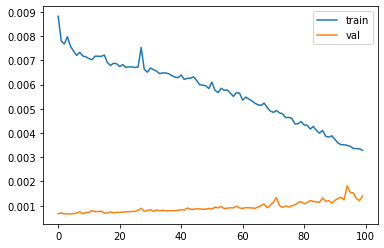

In [16]:
time_steps = trainX.shape[1]
features = trainX.shape[2]
pred_steps = output_period
pred_feat = 1

lstm_model = Sequential()

lstm_model.add(LSTM(50, return_sequences=False, input_shape=(time_steps, features)))
lstm_model.add(Dense(pred_steps*pred_feat))
lstm_model.add(Reshape([pred_steps, pred_feat]))

lstm_model.compile(loss="mse", optimizer="adam", metrics=["mse"]) # mae vs mse?

history = lstm_model.fit(trainX, trainY, epochs=100, validation_data=(valX, valY))

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [22]:
pred_val = lstm_model.predict(valX)
np.corrcoef(pred_val[:, 0, stock], valY[:, 0, stock])[0][1]

0.32906015283801265

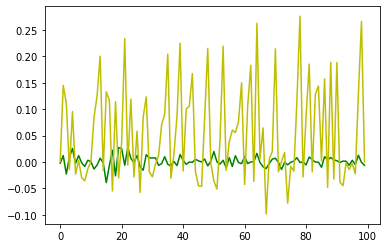

In [24]:
plt.plot(valY[1000:1100, : , 0], c="g")
plt.plot(pred_val[1000:1100, : , 0], c="y")

In [23]:
pred_val = lstm_model.predict(trainX)
np.corrcoef(pred_val[:, 0, stock], trainY[:, 0, stock])[0][1]

0.8312122644172011

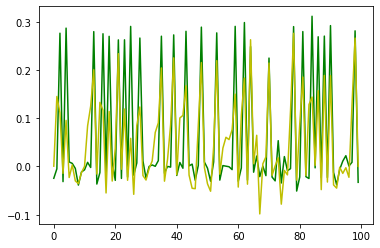

In [25]:
plt.plot(trainY[1000:1100, : , 0], c="g")
plt.plot(pred_val[1000:1100, : , 0], c="y")